# **Importing and Installing Tools**



In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 21.2 MB/s 
     |████████████████████████████████| 116 kB 16.3 MB/s 
     |████████████████████████████████| 243 kB 11.7 MB/s 
     |████████████████████████████████| 60 kB 2.2 MB/s 
     |████████████████████████████████| 147 kB 50.7 MB/s 
     |████████████████████████████████| 2.4 MB 12.4 MB/s 
     |████████████████████████████████| 41 kB 584 kB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 5.7 MB 41.8 MB/s 
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 46 kB 2.6 MB/s 
     |████████████████████████████████| 179 kB 29.1 MB/s 
     |████████████████████████████████| 2.2 MB 40.9 MB/s 
     |████████████████████████████████| 183 kB 57.3 MB/s 
     |████████████████████████████████| 78 kB 2.9 MB/s 
     |████████████████████████████████| 1.0

In [ ]:
!pip install splot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install esda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing EDA and Plotting Libraries
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
# plots should appear in the notebook
%matplotlib inline 
import seaborn as sns

# Visualization themes & styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Statistical Analysis Libraries
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.formula.api as sm
import statsmodels.api as sm

# Importing Spatial Analysis Libraries
import geopandas as gpd
from pysal.model import spreg
from pysal.lib import weights
import splot
from esda.moran import Moran, Moran_Local
import esda
import libpysal as lps
from libpysal.weights.contiguity import Queen
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

# Regression Models for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Connect Google Drive to Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Imports - NDVI Data**

In [ ]:
# Import Dissemination Area Boundary Data
peel_da_boundaries = gpd.read_file('/content/drive/MyDrive/GGR442_Project3_Data/2016_Census_DA.geojson')
peel_da_boundaries.head(10)

,OBJECTID,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,...,Mobility5_Movers,Mobility5_Non_migrants,Mobility5_Migrants,Mobility5_Internal_migrants,Mobility5_Intraprovincial_migra,Mobility5_Interprovincial_migra,Mobility5_External_migrants,SHAPE_Length,SHAPE_Area,geometry
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,315.0,105.0,210.0,210.0,210.0,0.0,0.0,0.202727,0.001740,"MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ..."
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,230.0,110.0,115.0,115.0,105.0,10.0,0.0,0.253848,0.003098,"MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ..."
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,205.0,45.0,155.0,155.0,145.0,10.0,0.0,0.152793,0.001292,"MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ..."
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,115.0,45.0,70.0,60.0,55.0,10.0,15.0,0.171581,0.001747,"MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ..."
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,205.0,55.0,150.0,145.0,140.0,10.0,0.0,0.211042,0.002237,"MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ..."
5,4095,35211615,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,255.0,55.0,200.0,200.0,205.0,0.0,10.0,0.275134,0.003125,"MULTIPOLYGON (((-79.91559 43.80088, -79.91566 ..."
6,4096,35211616,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,85.0,35.0,50.0,45.0,45.0,0.0,10.0,0.302833,0.002844,"MULTIPOLYGON (((-79.92523 43.86091, -79.92387 ..."
7,4097,35211617,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,130.0,10.0,125.0,125.0,125.0,0.0,0.0,0.112284,0.000470,"MULTIPOLYGON (((-79.97298 43.86101, -79.97063 ..."
8,4098,35211618,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,100.0,0.0,95.0,95.0,100.0,0.0,0.0,0.096395,0.000463,"MULTIPOLYGON (((-79.99101 43.86462, -79.99201 ..."
9,4099,35211619,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,85.0,10.0,75.0,75.0,75.0,0.0,0.0,0.096173,0.000476,"MULTIPOLYGON (((-80.00640 43.85145, -80.00704 ..."


In [ ]:
# Description of Peel DA Boundaries 
print(peel_da_boundaries.shape)
peel_da_boundaries.dtypes

(1650, 314)


OBJECTID                              int64
DAUID                                object
PRUID                                object
PRNAME                               object
CDUID                                object
                                     ...   
Mobility5_Interprovincial_migra     float64
Mobility5_External_migrants         float64
SHAPE_Length                        float64
SHAPE_Area                          float64
geometry                           geometry
Length: 314, dtype: object

In [ ]:
peel_da_boundaries['DAUID'] = pd.to_numeric(peel_da_boundaries['DAUID'])
peel_da_boundaries.dtypes

OBJECTID                              int64
DAUID                                 int64
PRUID                                object
PRNAME                               object
CDUID                                object
                                     ...   
Mobility5_Interprovincial_migra     float64
Mobility5_External_migrants         float64
SHAPE_Length                        float64
SHAPE_Area                          float64
geometry                           geometry
Length: 314, dtype: object

In [ ]:
# Import 2006 NDVI Data
ndvi_2006_data_df = pd.read_csv('/content/drive/MyDrive/GEE output/landsat7_ndvi_Peel_2006.csv')
ndvi_2006_data_df.head(10)

# Drop the useless geometry column
ndvi_2006_data_df = ndvi_2006_data_df.drop(['.geo', 'system:index'], axis = 1)
ndvi_2006_data_df.head(5)

,ADAUID,ADAUID_1,APMean,Area_km2,CCSNAME,CCSNAME_1,CCSUID,CCSUID_1,CCSUID_12,CCSUID_12_,...,SHAPE_Le_2,SHAPE_Le_3,SHAPE_Leng,Shape_Area,Shape_Le_1,geometry,mean,mean_1,system_i_1,system_ind
0,0,0,0.0,695.993029,NaN,NaN,3519028,0,0,0,...,0.0,0.0,151323.106534,1.014286e-06,0.051740,NaN,0.229357,0.0,NaN,NaN
1,0,0,0.0,695.993029,NaN,NaN,3519028,0,0,0,...,0.0,0.0,151323.106534,2.239929e-06,0.013549,NaN,0.165667,0.0,NaN,NaN
2,0,0,0.0,269.455099,NaN,NaN,3519028,0,0,0,...,0.0,0.0,99794.651042,1.745609e-07,0.041966,NaN,0.233784,0.0,NaN,NaN
3,0,0,0.0,269.455099,NaN,NaN,3519028,0,0,0,...,0.0,0.0,99794.651042,7.456979e-06,0.077309,NaN,0.136532,0.0,NaN,NaN
4,0,0,0.0,695.993029,NaN,NaN,3519049,0,0,0,...,0.0,0.0,151323.106534,1.118867e-06,0.059524,NaN,0.308877,0.0,NaN,NaN


In [ ]:
# Description of Peel 2006 NDVI Data
print(ndvi_2006_data_df.shape)
ndvi_2006_data_df.dtypes

(1545, 90)


ADAUID          int64
ADAUID_1        int64
APMean        float64
Area_km2      float64
CCSNAME        object
               ...   
geometry      float64
mean          float64
mean_1        float64
system_i_1     object
system_ind     object
Length: 90, dtype: object

In [ ]:
# Merge Peel Boundary Files to 2006 NDVI Air Pollution
peel_ndvi_2006_df = peel_da_boundaries.merge(ndvi_2006_data_df, on = 'DAUID')
peel_ndvi_2006_df

,OBJECTID_x,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,SHAPE_Le_2,SHAPE_Le_3,SHAPE_Leng,Shape_Area,Shape_Le_1,geometry_y,mean,mean_1,system_i_1,system_ind
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,25568.578902,25568.578902,151323.106534,0.001741,0.202547,NaN,0.259601,0.760546,00000000000000000000,00000000000000000000
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,32170.972280,32170.972280,151323.106534,0.003098,0.253919,NaN,0.341906,0.778237,00000000000000000001,00000000000000000001
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,19780.911767,19780.911767,151323.106534,0.001317,0.157871,NaN,0.306610,0.695397,00000000000000000002,00000000000000000002
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,22667.200689,22667.200689,151323.106534,0.001746,0.171497,NaN,0.308635,0.721153,00000000000000000003,00000000000000000003
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,27984.249081,27984.249081,151323.106534,0.002236,0.210680,NaN,0.348269,0.793586,00000000000000000004,00000000000000000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,8841,35211440,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,4248.849567,4248.849567,139183.481405,0.000029,0.033832,NaN,0.197850,0.486300,00000000000000000667,00000000000000000667
1389,8842,35211442,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,2399.202689,2399.202689,139183.481405,0.000014,0.018705,NaN,0.159573,0.316269,00000000000000000668,00000000000000000668
1390,8843,35211443,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,1932.818282,1932.818282,139183.481405,0.000013,0.014995,NaN,0.121312,0.391107,00000000000000000669,00000000000000000669
1391,8844,35211505,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,1106.625134,1106.625134,139183.481405,0.000005,0.008507,NaN,0.229607,0.494459,0000000000000000066a,0000000000000000066a


# **Data Exploration and Visualizations - NDVI Data**

In [ ]:
# Summary Statistics of NDVI in 2006 for Peel Region
peel_ndvi_2006_df['mean'].describe()

count    1391.000000
mean        0.165099
std         0.071884
min        -0.245930
25%         0.125688
50%         0.158170
75%         0.201452
max         0.374155
Name: mean, dtype: float64

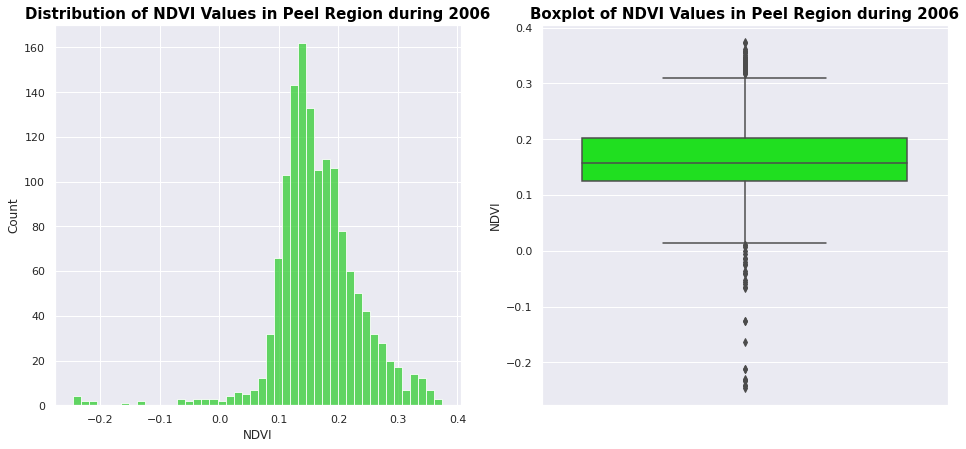

In [ ]:
# Histogram and Box Plots of NDVI in 2006 for Peel Region
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (16, 7))

# Histogram for 2006 NDVI 
sns.histplot(ax = ax1, data = peel_ndvi_2006_df, x = 'mean', color = 'limegreen')
ax1.set_title('Distribution of NDVI Values in Peel Region during 2006', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("NDVI")
ax1.set_ylabel("Count");

# Boxplot for 2006 NDVI 
sns.boxplot(ax = ax2, y = peel_ndvi_2006_df['mean'], color = 'lime')
ax2.set_title('Boxplot of NDVI Values in Peel Region during 2006', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("NDVI");

In [ ]:
# Computing Skewness and Kurtosis of NDVI variable
print("The Skewness of the NDVI Values in 2006 for Peel Region: " + str(peel_ndvi_2006_df['mean'].skew()))
print("The kurtosis of the NDVI Values in 2006 for Peel Region: " + str(peel_ndvi_2006_df['mean'].kurt()))

The Skewness of the NDVI Values in 2006 for Peel Region: -0.814318917598812
The kurtosis of the NDVI Values in 2006 for Peel Region: 5.639120625909843


# **Data Imports - NO$_{2}$ Data**

In [ ]:
# Import 2006 NO2 Data
no2_2006_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/AP_06.csv')
no2_2006_data_df.head(10)

# Drop the useless geometry column
no2_2006_data_df = no2_2006_data_df.drop('geometry', axis = 1)
no2_2006_data_df.head(5)

,DAUID,CSDUID,CCSUID,CDUID,ERUID,PRUID,CTUID,CMAUID,APMean
0,35210001,3521024,3521024,3521,3530,35,5350585.08,535,6.999896
1,35210002,3521024,3521024,3521,3530,35,5350585.08,535,6.747858
2,35210003,3521024,3521024,3521,3530,35,5350585.08,535,6.607805
3,35210004,3521024,3521024,3521,3530,35,5350585.08,535,7.631021
4,35210011,3521024,3521024,3521,3530,35,5350586.01,535,7.847581


In [ ]:
# Description of Peel 2006 NO2 Data
print(no2_2006_data_df.shape)
no2_2006_data_df.dtypes

(1456, 9)


DAUID       int64
CSDUID      int64
CCSUID      int64
CDUID       int64
ERUID       int64
PRUID       int64
CTUID     float64
CMAUID      int64
APMean    float64
dtype: object

In [ ]:
# Merge Peel Boundary Files to 2006 NO2 Air Pollution
peel_no2_2006_df = peel_da_boundaries.merge(no2_2006_data_df, on = 'DAUID')
peel_no2_2006_df

,OBJECTID,DAUID,PRUID_x,PRNAME,CDUID_x,CDNAME,CDTYPE,CCSUID_x,CCSNAME,CSDUID_x,...,SHAPE_Area,geometry,CSDUID_y,CCSUID_y,CDUID_y,ERUID_y,PRUID_y,CTUID_y,CMAUID_y,APMean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,0.001740,"MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...",3521024,3521024,3521,3530,35,5350585.07,535,6.710840
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,0.003098,"MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...",3521024,3521024,3521,3530,35,5350585.07,535,6.550836
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,0.001292,"MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...",3521024,3521024,3521,3530,35,5350586.01,535,8.445314
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,0.001747,"MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...",3521024,3521024,3521,3530,35,5350586.02,535,8.510772
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,0.002237,"MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...",3521024,3521024,3521,3530,35,5350586.02,535,8.550670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,8841,35211440,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,0.000029,"MULTIPOLYGON (((-79.62180 43.59370, -79.62173 ...",3521005,3521005,3521,3530,35,5350521.03,535,19.964281
1359,8842,35211442,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,0.000014,"MULTIPOLYGON (((-79.60906 43.57673, -79.61012 ...",3521005,3521005,3521,3530,35,5350512.00,535,20.837202
1360,8843,35211443,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,0.000014,"MULTIPOLYGON (((-79.61053 43.57150, -79.61057 ...",3521005,3521005,3521,3530,35,5350513.03,535,20.974375
1361,8844,35211505,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,0.000005,"MULTIPOLYGON (((-79.59389 43.60765, -79.59397 ...",3521005,3521005,3521,3530,35,5350524.01,535,24.948547


In [ ]:
# Ensure that geometry is retained with 2006 NO2 Data
peel_no2_2006_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1358    MULTIPOLYGON (((-79.62180 43.59370, -79.62173 ...
1359    MULTIPOLYGON (((-79.60906 43.57673, -79.61012 ...
1360    MULTIPOLYGON (((-79.61053 43.57150, -79.61057 ...
1361    MULTIPOLYGON (((-79.59389 43.60765, -79.59397 ...
1362    MULTIPOLYGON (((-79.59474 43.60811, -79.59397 ...
Name: geometry, Length: 1363, dtype: geometry

# **Data Exploration and Visualizations - NO$_{2}$ Data**

In [ ]:
# Summary Statistics of NO2 in 2006 for Peel Region
peel_no2_2006_df['APMean'].describe()

count    1363.000000
mean       18.672486
std         4.047599
min         6.295832
25%        16.826613
50%        19.037871
75%        21.118922
max        32.214917
Name: APMean, dtype: float64

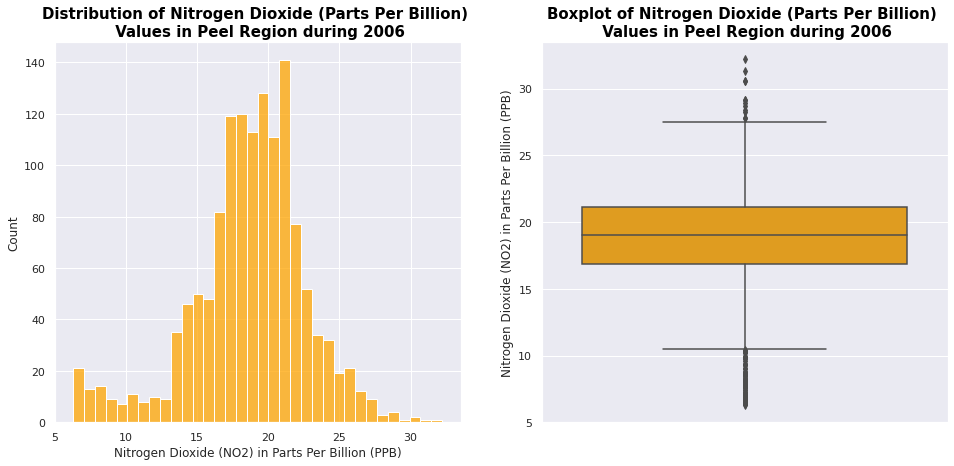

In [ ]:
# Histogram and Box Plots of NO2 in 2006 for Peel Region
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (16, 7))

# Histogram for 2006 NO2
sns.histplot(ax = ax1, data = peel_no2_2006_df, x = 'APMean', color = 'orange')
ax1.set_title('Distribution of Nitrogen Dioxide (Parts Per Billion) \n Values in Peel Region during 2006', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("Nitrogen Dioxide (NO2) in Parts Per Billion (PPB)")
ax1.set_ylabel("Count");

# Boxplot for 2006 NO2
sns.boxplot(ax = ax2, y = peel_no2_2006_df['APMean'], color = 'orange')
ax2.set_title('Boxplot of Nitrogen Dioxide (Parts Per Billion) \n Values in Peel Region during 2006', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("Nitrogen Dioxide (NO2) in Parts Per Billion (PPB)");

In [ ]:
# Computing Skewness and Kurtosis of Nitrogen Dioxide variable
print("The Skewness of the Nitrogen Dioxide Values in 2011 for Peel Region: " + str(peel_no2_2006_df['APMean'].skew()))
print("The kurtosis of the Nitrogen Dioxide Values in 2011 for Peel Region: " + str(peel_no2_2006_df['APMean'].kurt()))

The Skewness of the Nitrogen Dioxide Values in 2011 for Peel Region: -0.6031205142266233
The kurtosis of the Nitrogen Dioxide Values in 2011 for Peel Region: 1.1788842111109599


# **Data Merging - Merging NO$_{2}$ and NDVI Data**

In [ ]:
# Merge 2006 Pollutant and NDVI Data
peel_ndvi_2006_relevant_info_df = peel_ndvi_2006_df[['DAUID', 'mean']]
peel_ndvi_2006_relevant_info_df.head(5)
peel_2006_df = peel_no2_2006_df.merge(peel_ndvi_2006_relevant_info_df, on = 'DAUID')
peel_2006_df.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME,CDUID_x,CDNAME,CDTYPE,CCSUID_x,CCSNAME,CSDUID_x,...,geometry,CSDUID_y,CCSUID_y,CDUID_y,ERUID_y,PRUID_y,CTUID_y,CMAUID_y,APMean,mean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,"MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...",3521024,3521024,3521,3530,35,5350585.07,535,6.710840,0.259601
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,"MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...",3521024,3521024,3521,3530,35,5350585.07,535,6.550836,0.341906
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,"MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...",3521024,3521024,3521,3530,35,5350586.01,535,8.445314,0.306610
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,"MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...",3521024,3521024,3521,3530,35,5350586.02,535,8.510772,0.308635
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,"MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...",3521024,3521024,3521,3530,35,5350586.02,535,8.550670,0.348269


In [ ]:
# Inspect Accuracy of Merge
peel_2006_df[peel_2006_df['DAUID'] == 35212104]

,OBJECTID,DAUID,PRUID_x,PRNAME,CDUID_x,CDNAME,CDTYPE,CCSUID_x,CCSNAME,CSDUID_x,...,geometry,CSDUID_y,CCSUID_y,CDUID_y,ERUID_y,PRUID_y,CTUID_y,CMAUID_y,APMean,mean


In [ ]:
# Explore 2006 NDVI Data
peel_2006_df['mean'].describe()

count    1391.000000
mean        0.165099
std         0.071884
min        -0.245930
25%         0.125688
50%         0.158170
75%         0.201452
max         0.374155
Name: mean, dtype: float64

In [ ]:
# Explore 2006 Nitrogen Dioxide Data
peel_2006_df['APMean'].describe()

count    1391.000000
mean       18.636080
std         4.114943
min         6.295832
25%        16.762668
50%        19.026679
75%        21.118922
max        32.214917
Name: APMean, dtype: float64

In [ ]:
# Handle Missing Values
peel_2006_df['mean'].replace('', np.nan, inplace=True)
peel_2006_df.dropna(subset=['mean'], inplace=True)

In [ ]:
# Inspected Explore 2006 NDVI Data
peel_2006_df['mean'].describe()

count    1391.000000
mean        0.165099
std         0.071884
min        -0.245930
25%         0.125688
50%         0.158170
75%         0.201452
max         0.374155
Name: mean, dtype: float64

In [ ]:
# Inspect Cleaned 2006 Nitrogen Dioxide Data
peel_2006_df['APMean'].describe()

count    1391.000000
mean       18.636080
std         4.114943
min         6.295832
25%        16.762668
50%        19.026679
75%        21.118922
max        32.214917
Name: APMean, dtype: float64

# **Correlation Analysis**

In [ ]:
# Pearson's Correlation Test for 2006 NDVI and 2006 NO2
stat, p = pearsonr(peel_2006_df['mean'], peel_2006_df['APMean'])
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=-0.1721603273, p=0.0000000001
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


# **Data Preprocessing for Linear Modeling**

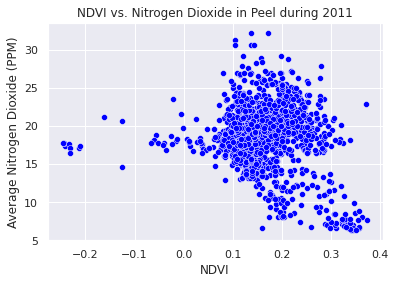

In [ ]:
# Scatter Plot of NDVI vs. Nitrogen Dioxide in Peel during 2006
ax = sns.scatterplot(data = peel_2006_df, x = 'mean', y = 'APMean', color = 'blue');
plt.xlabel("NDVI")
plt.ylabel("Average Nitrogen Dioxide (PPM)")
plt.title("NDVI vs. Nitrogen Dioxide in Peel during 2011") 
plt.show();

In [ ]:
# Split Data into X (predictor) and y (target)
X = peel_2006_df['mean']
y = peel_2006_df['APMean']

# **Linear Modeling**

In [ ]:
# Acquire Linear Regression Model Accuracy with NumPy
res = stats.linregress(X, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.029639


In [ ]:
# OLS Linear Model with 2006 Data
baseline_sp_ols_reg = spreg.OLS(peel_2006_df[['APMean']].values, peel_2006_df[['mean']].values)
print(baseline_sp_ols_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1391
Mean dependent var  :     18.6361                Number of Variables   :           2
S.D. dependent var  :      4.1149                Degrees of Freedom    :        1389
R-squared           :      0.0296
Adjusted R-squared  :      0.0289
Sum squared residual:   22838.929                F-statistic           :     42.4263
Sigma-square        :      16.443                Prob(F-statistic)     :   1.023e-10
S.E. of regression  :       4.055                Log likelihood        :   -3920.061
Sigma-square ML     :      16.419                Akaike info criterion :    7844.122
S.E of regression ML:      4.0520                Schwarz criterion     :    7854.598

-----------------------------------------------------------------------------

# **Data Preprocessing for Linear Modeling with Log-Transformed Data**

In [ ]:
# Log Transforming Skewed NDVI Values
peel_2006_df["log_ndvi"] = np.log(peel_2006_df["mean"] + 0.000001)
peel_2006_df['log_ndvi']

0      -1.348606
1      -1.073216
2      -1.182177
3      -1.175592
4      -1.054778
          ...   
1388   -1.620239
1389   -1.835250
1390   -2.109379
1391   -1.471380
1392   -1.719897
Name: log_ndvi, Length: 1391, dtype: float64

In [ ]:
# Split the data into X and y
peel_2006_df.dropna(subset=['log_ndvi'], inplace=True)
X = peel_2006_df['log_ndvi']

y = peel_2006_df['APMean']

# **Linear Modeling with Log-Transformed Data**

In [ ]:
# Acquire Linear Regression Model Accuracy with NumPy on Log-Transformed Data
res = stats.linregress(X, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.018661


In [ ]:
# OLS Linear Model with 2006 Data
baseline_sp_ols_reg = spreg.OLS(peel_2006_df[['APMean']].values, peel_2006_df[['log_ndvi']].values)
print(baseline_sp_ols_reg.summary) 

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1365
Mean dependent var  :     18.6433                Number of Variables   :           2
S.D. dependent var  :      4.1465                Degrees of Freedom    :        1363
R-squared           :      0.0187
Adjusted R-squared  :      0.0179
Sum squared residual:   23014.167                F-statistic           :     25.9181
Sigma-square        :      16.885                Prob(F-statistic)     :   4.061e-07
S.E. of regression  :       4.109                Log likelihood        :   -3864.883
Sigma-square ML     :      16.860                Akaike info criterion :    7733.767
S.E of regression ML:      4.1061                Schwarz criterion     :    7744.204

-----------------------------------------------------------------------------

Worsened Performance LOL great suggestion made.

# **Spatial Autocorrelation of NO$_{2}$ - Moran's I**

In [ ]:
# Spatial Weights
wq = lps.weights.KNN.from_dataframe(peel_2006_df, k=5)

# Row-Standardization
wq.transform = 'r'

# Spatial Lag of Nitrogen Dioxide Data
peel_2006_df['APMean'] = lps.weights.lag_spatial(wq, peel_2006_df['APMean'])

# Moran's I
y = peel_2006_df.APMean
moran = Moran(y, wq)
moran.I

0.9693380060669922

# **Spatial Regression Modeling - Spatially Lagged Regression**

In [ ]:
# Create weights
w_ndvi = weights.KNN.from_dataframe(peel_2006_df, k = 5)

# Assign spatial lag based on the pool values
lagged = peel_2006_df.assign(w_ndvi = weights.spatial_lag.lag_spatial(w_ndvi, peel_2006_df['mean'].values))
lagged.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME,CDUID_x,CDNAME,CDTYPE,CCSUID_x,CCSNAME,CSDUID_x,...,CCSUID_y,CDUID_y,ERUID_y,PRUID_y,CTUID_y,CMAUID_y,APMean,mean,log_ndvi,w_ndvi
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,3521024,3521,3530,35,5350585.07,535,6.777340,0.259601,-1.348606,1.453492
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,3521024,3521,3530,35,5350585.07,535,6.770846,0.341906,-1.073216,1.585517
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,3521024,3521,3530,35,5350586.01,535,8.460060,0.306610,-1.182177,1.639448
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,3521024,3521,3530,35,5350586.02,535,9.357354,0.308635,-1.175592,1.540883
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,3521024,3521,3530,35,5350586.02,535,9.193698,0.348269,-1.054778,1.627286


In [ ]:
# Spatially Lagged Regression Model
sp_lag_reg = spreg.OLS(lagged[['APMean']].values, lagged[['w_ndvi']].values)
print(sp_lag_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1365
Mean dependent var  :     18.5554                Number of Variables   :           2
S.D. dependent var  :      3.8881                Degrees of Freedom    :        1363
R-squared           :      0.0429
Adjusted R-squared  :      0.0422
Sum squared residual:   19735.868                F-statistic           :     61.0850
Sigma-square        :      14.480                Prob(F-statistic)     :   1.086e-14
S.E. of regression  :       3.805                Log likelihood        :   -3760.002
Sigma-square ML     :      14.459                Akaike info criterion :    7524.004
S.E of regression ML:      3.8024                Schwarz criterion     :    7534.442

-----------------------------------------------------------------------------

# **Machine Learning**

In [ ]:
# Split the data into X and y
X = peel_2006_df['mean']

y = peel_2006_df['APMean']

In [ ]:
# Set random seed for consistency and reproducibility
np.random.seed(42)

# Split data into train & sets
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

# Sizes of test & training sets
# Sizes of test & training sets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is: (1092,)
The shape of X_test is:  (273,)
The shape of y_train is: (1092,)
The shape of y_test is:  (273,)


In [ ]:
# Converting Predictor and Target into NumPy Arrays for Scikit-Learn
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Reshaping NumPy Arrays to Train and Test Models in Scikit-Learn (Only 1 Predictor)
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# Models 
models = {"Lasso": Lasso(),
          "Elastic Net": ElasticNet(),
          "KNN Regressor": KNeighborsRegressor(),
          "SVR": SVR(),
          "Gradient Boost": GradientBoostingRegressor(),
          "Random Forest": RandomForestRegressor(),}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning mdoels.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """
    # Random seed for consistent and reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
# Obtain scores for models
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'Lasso': -0.0008841063308726582,
 'Elastic Net': -0.0008841063308726582,
 'KNN Regressor': -0.06141856801043577,
 'SVR': 0.08448506208948481,
 'Gradient Boost': -0.003159627522391295,
 'Random Forest': -0.32540828443040515}

In [ ]:
# Put models into dataframe for comparison
model_compare = pd.DataFrame(model_scores, index = ["R^2"])
model_compare

,Lasso,Elastic Net,KNN Regressor,SVR,Gradient Boost,Random Forest
R^2,-0.000884,-0.000884,-0.061419,0.084485,-0.00316,-0.325408


                                                      Model Comparison:                                                      
                                               _______________________________                                               


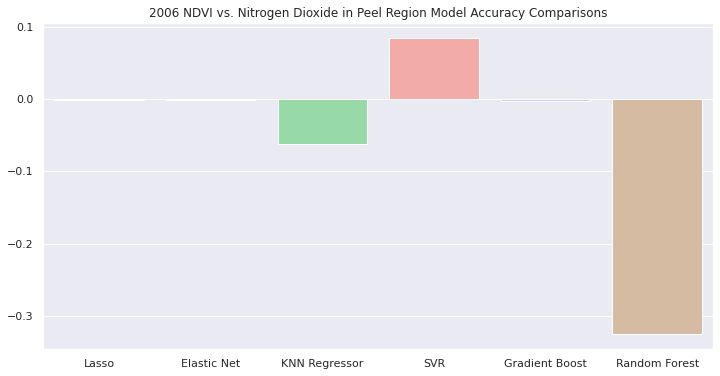

In [ ]:
# Visualize model results
# Title for Model Comparison Bar Plot
title_graph = "Model Comparison:"
centered_title = title_graph.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plot model results
plt.figure(figsize = (12, 6))
model_compare_plot = sns.barplot(data = model_compare)
plt.title('2006 NDVI vs. Nitrogen Dioxide in Peel Region Model Accuracy Comparisons');